原始数据形状: (1797, 64)
PCA降维后形状: (1797, 2)


/home/lxk/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP降维后形状: (1797, 2)


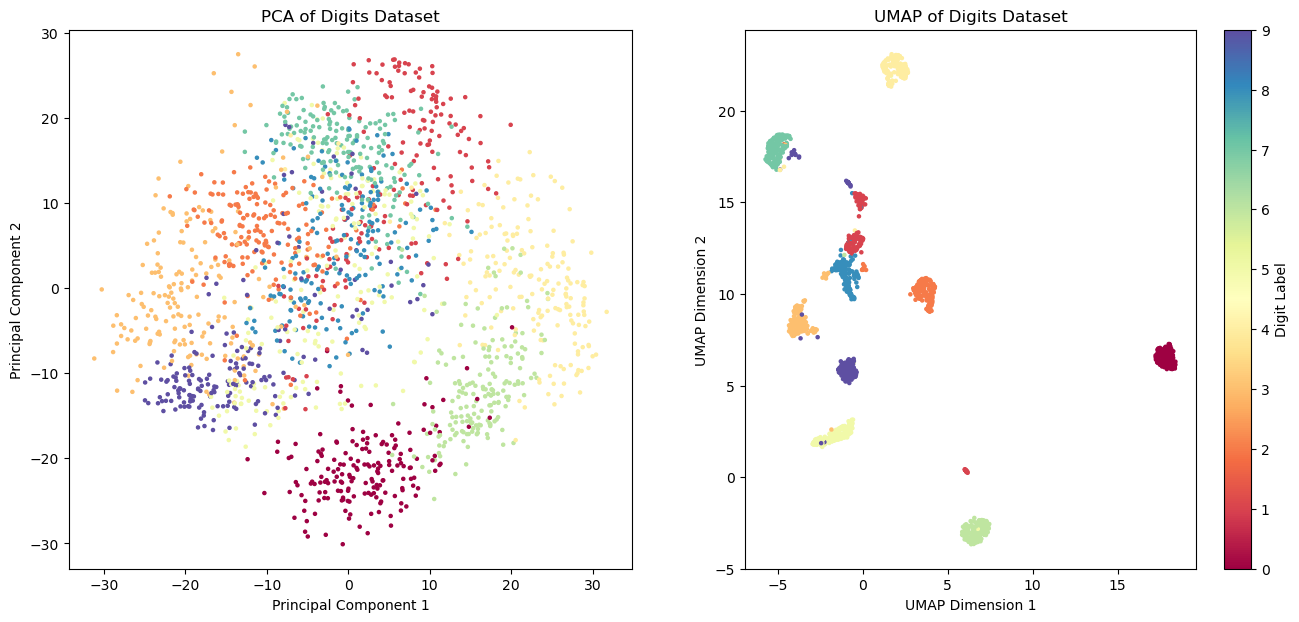

In [4]:
from sklearn.decomposition import PCA
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 1. 加载digits（手写数字）数据集
# 这是一个包含10个类别的高维数据集，非常适合降维可视化
digits = load_digits()
X, y = digits.data, digits.target
print(f"原始数据形状: {X.shape}") # (1797, 64)

# 2. 使用PCA进行降维
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
print(f"PCA降维后形状: {X_pca.shape}") # (1797, 2)

# 3. 使用UMAP进行降维
# n_neighbors和min_dist是UMAP的关键参数，影响着可视化结果的细节
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X)
print(f"UMAP降维后形状: {X_umap.shape}") # (1797, 2)

# 4. 可视化对比
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# PCA结果
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', s=5)
ax1.set_title("PCA of Digits Dataset")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")

# UMAP结果
scatter = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=5)
ax2.set_title("UMAP of Digits Dataset")
ax2.set_xlabel("UMAP Dimension 1")
ax2.set_ylabel("UMAP Dimension 2")

# 添加颜色图例
fig.colorbar(scatter, ax=ax2, ticks=range(10), label='Digit Label')

plt.show()

In [8]:
import sys
print(sys.executable)

/home/lxk/miniconda3/bin/python


In [7]:
from sklearn.datasets import load_digits

digits = load_digits()

# 查看数据集描述
print(digits.DESCR)  # 完整描述
print("\n数据形状:", digits.data.shape)  # (1797, 64)
print("目标形状:", digits.target.shape)  # (1797,)
print("类别数量:", len(digits.target_names))  # 10 (0-9)
print("特征数量:", len(digits.feature_names)) if hasattr(digits, 'feature_names') else print("特征数量: 64")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

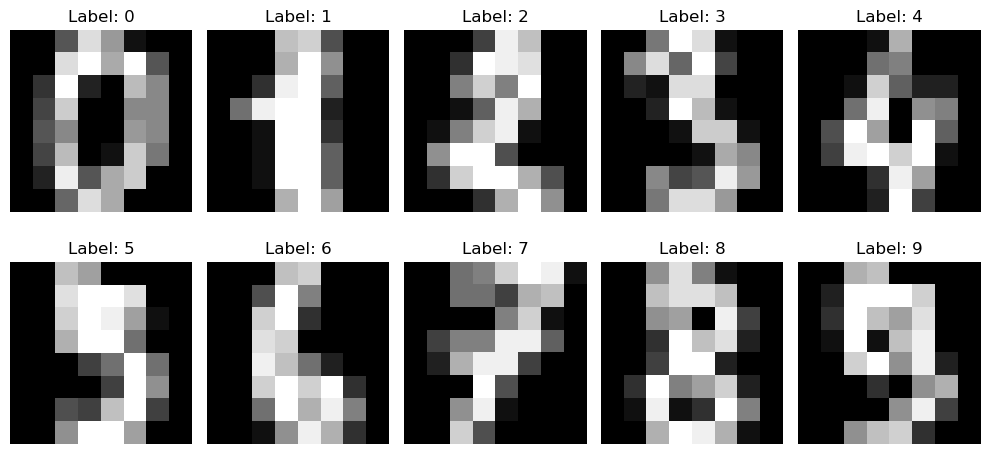

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 展示前几个数字图像
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    # 将64维向量重塑为8x8图像
    image = digits.images[i]  # 直接使用images属性，无需reshape
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {digits.target[i]}')
    axes[i].axis('off')  # 隐藏坐标轴

plt.tight_layout()
plt.show()

In [9]:
print("数据类型:", digits.data.dtype)  # 通常是 float64
print("数据范围:", digits.data.min(), "to", digits.data.max())  # 0 to 16 (灰度值)
print("每个像素的取值范围:", np.unique(digits.data))  # 0-16 的整数

# 如果你想查看原始图像的形状
print("单张图像形状:", digits.images[0].shape)  # (8, 8)

数据类型: float64
数据范围: 0.0 to 16.0
每个像素的取值范围: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
单张图像形状: (8, 8)


In [10]:
X_pca

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

In [11]:
X_umap

array([[17.840036  ,  7.008306  ],
       [-0.13529105, 13.082402  ],
       [-0.04544288, 11.323319  ],
       ...,
       [-0.834718  , 11.56674   ],
       [-1.370289  ,  5.8799458 ],
       [-0.9782979 , 10.761503  ]], dtype=float32)

In [13]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])